In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [10]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [11]:
import datetime as dt

In [12]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [13]:
df=data.loc['0':'207']

In [14]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [15]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
Y1 = df['NH3']

In [16]:
xtrain=X1.loc['0':'155']
ytrain=Y1.loc['0':'155',]
xtest=X1.loc['155':'207']
ytest=Y1.loc['155':'207']

In [19]:
grad_boost = GradientBoostingRegressor(n_estimators=1500,
                                      max_depth=8,
                                      max_features=0.2,
                                      min_samples_split=4,
                                      min_samples_leaf=6,
                                      learning_rate=0.01)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.01, max_depth=8, max_features=0.2,
                          min_samples_leaf=6, min_samples_split=4,
                          n_estimators=1500)

In [20]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9992911537377773

Score on test data: -5.503047674290153

Root Mean Squared Error: 13.073029799484525

Overall model accuracy: -5.503047674290153


In [21]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,ATy1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NOxy3,NH3y3,COy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,8.394286,217.428571,371.975714,...,416.398571,100.627143,83.730000,212.015714,56.007143,2.998571,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,8.800000,264.292857,452.655714,...,332.717143,98.832857,67.225714,194.864286,57.234286,3.004286,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,11.971429,191.864286,344.172857,...,282.434286,101.944286,57.842857,190.755714,48.108571,2.867143,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,9.905714,237.660000,405.398571,...,346.604286,94.412857,75.028571,195.770000,43.388571,2.740000,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,10.632857,173.172857,302.185714,...,237.858571,49.015714,68.434286,127.910000,44.487143,1.844286,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,9.834286,143.550000,284.925714,...,251.350000,74.012857,62.091429,156.391429,42.347143,2.127143,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,11.920000,193.068571,331.052857,...,328.171429,153.021429,66.960000,268.622857,39.584286,2.754286,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,13.324286,109.957143,204.577143,...,279.338571,50.672857,67.874286,129.678571,30.340000,1.890000,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,15.858571,166.732857,330.682857,...,275.608571,34.234286,82.401429,120.168571,37.265714,1.715714,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,12.517143,109.975714,228.510000,...,280.377143,38.925714,62.438571,108.778571,26.370000,1.704286,17.097143,2020,3,1


In [22]:
predict=grad_boost.predict(X)

In [23]:
predict

array([55.21311152, 57.87611949, 40.64464672, 42.93370537, 37.07705793,
       32.76766633, 37.07165133, 34.42370864, 35.19588487, 38.7230654 ,
       37.74309513, 35.49315567, 32.41798437, 35.2167818 , 36.94108077,
       30.19251394, 26.22329806, 34.03215413, 28.91751921, 37.43376891,
       30.95137   , 28.80692291, 26.6945172 , 27.15728477, 22.56050845,
       28.23103823, 28.19333029, 27.92290375, 25.89123641, 20.22296661,
       21.64119007, 20.03561472, 17.02286168, 18.23546819, 19.41480506,
       19.23154597, 25.96220159, 23.15318593, 23.58035939, 25.23723373,
       34.88596907, 35.41162185, 37.04113705, 36.22348897, 42.80883978,
       38.44210278, 48.52173052, 39.49082427, 38.68196567, 38.34180212,
       41.0304952 , 41.13131905, 41.86084078])

In [24]:
dates=data.loc['207':'259','From Date']

In [25]:
X['From Date']=dates.values

In [26]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1', 'ATy1',
       'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3', 'ATy3',
       'year', 'month', 'day', 'From Date'],
      dtype='object')

In [27]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [28]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [29]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [30]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

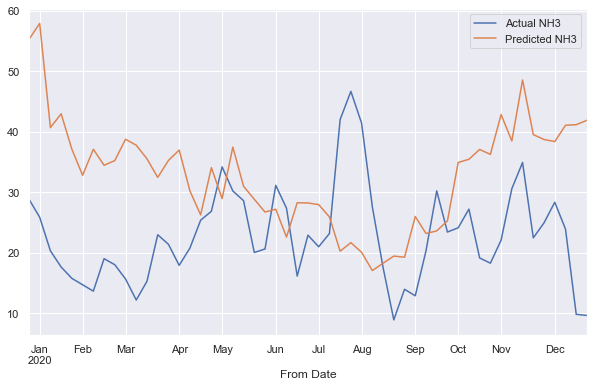

In [31]:
test['NH3'].plot(legend=True, label='Actual NH3', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NH3')

In [32]:
np.sqrt(mean_squared_error(test['NH3'],X['pred']))

16.21716512921102

In [33]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 10.316615380850104
MSE: 170.90410813821038
RMSE: 13.073029799484525
R-Squared: -5.503047674290153


In [34]:
mae = metrics.mean_absolute_error(test['NH3'],X['pred'])
mse = metrics.mean_squared_error(test['NH3'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NH3'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.82269620720701
MSE: 262.9964448280979
RMSE: 16.21716512921102
R-Squared: -3.1424146308814613


In [35]:
import pickle
filename = 'NH3_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [36]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

-5.503047674290153


# 3rd plot

In [37]:
testcase = pd.DataFrame()

In [38]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [39]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [40]:
testcase

,test,pred,Corrected
155,32.607143,32.758769,19.685739
156,29.011429,49.460904,36.387875
157,31.015714,41.266122,28.193092
158,28.408571,39.045372,25.972342
159,23.565714,39.677570,26.604540
160,23.558571,37.821631,24.748602
161,22.507143,37.743578,24.670548
162,27.225714,34.669536,21.596506
163,27.742857,35.629149,22.556120
164,27.334286,34.218171,21.145141


In [41]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [42]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

-0.07462469059449295

In [43]:
test2020=pd.DataFrame()

In [44]:
test2020['test']=test['NH3']
test2020['pred']=X['pred']

In [45]:
test2020.index=test.index

In [46]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

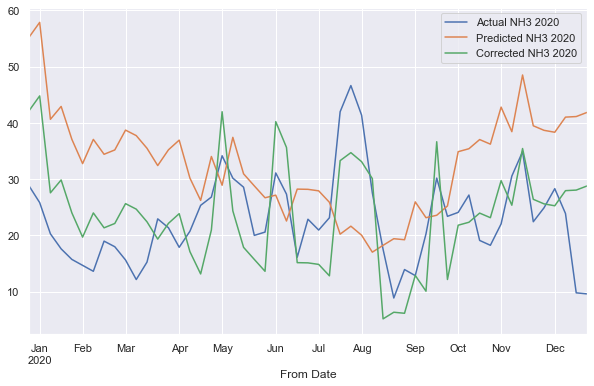

In [47]:
test2020['test'].plot(legend=True, label='Actual NH3 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NH3 2020')
test2020["Corrected"].plot(legend=True, label='Corrected NH3 2020')

In [48]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.14689129563948344